In [113]:

# In[1]:
import os
from datetime import datetime
print("[",str(datetime.now()),"]",": Deactivation model 2.1 triggered")
a = datetime.now()
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from pyhive import hive

import xgboost as xgb
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
#import pickle as pkl

import matplotlib.pylab as plt
# %matplotlib inline
from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 14, 7

# pd.set_option('display.width', 5000) 
# pd.set_option('display.max_columns', 60)
# pd.set_option('display.max_rows', 100)

# %matplotlib inline

# pd.set_option('display.width', 5000) 
# pd.set_option('display.max_columns', 60)
# pd.set_option('display.max_rows', 100)


# In[2]:



('[', '2019-01-25 19:35:09.841103', ']', ': Deactivation model 2.1 triggered')


In [117]:


print("[",str(datetime.now()),"]",": Reading training data from Cerebro...")

conn = hive.Connection(host="cerebro-hive-server1.snc1", port=10000, username="mdeitch")
#query ="select * from grp_gdoop_clv_db.cdf_final_training where record_date = date_sub(current_date, 1) and rand() <= 0.5 distribute by rand() sort by rand() limit 10000000"
query ="select * from grp_gdoop_clv_db.cdf_final_training_sample"



# limit 100

df_raw = pd.read_sql(query,conn)


#query2 = "select * from grp_gdoop_clv_db.eb_pip_deact_all_features where record_date = date_sub(current_date, 1) and rand() <= 0.5 distribute by rand() sort by rand() limit 10000000"
query2 = "select * from grp_gdoop_clv_db.eb_pip_deact_all_features_sample"

df_raw2 = pd.read_sql(query2,conn)

# In[3]:
print("[",str(datetime.now()),"]",": Training data read complete. Feature engineering started...")

df_raw = df_raw.rename(columns={col: col.split('.')[1] for col in df_raw.columns})
df_raw2 = df_raw2.rename(columns={col: col.split('.')[1] for col in df_raw2.columns})
# df_raw



('[', '2019-01-25 20:05:00.559554', ']', ': Reading training data from Cerebro...')
('[', '2019-01-25 20:05:51.204994', ']', ': Training data read complete. Feature engineering started...')


In [118]:
pd.set_option('display.max_columns', None)  
df_raw.describe()

,tenure_days,recency,frequency_t24m,nob_t24m,gp_t24m,frequency_t12m,nob_t12m,gp_t12m,local_orders_t24m,shopping_orders_t24m,travel_orders_t24m,app_orders_t24m,touch_orders_t24m,web_orders_t24m,is_activation,is_reactivation,unique_purchase_quarters_t24m,visit_recency,visit_freq_90d,visit_freq_7d,visit_freq_14d,visit_freq_28d,available_deal_views_90d,appfrequency,webfrequency,touchfrequency,bcookies,send_recency,sends_7d,sends_30d,open_recency,uniq_3day_opens_7d,uniq_3day_opens_30d,click_recency,uniq_3day_clicks_7d,uniq_3day_clicks_30d,unsubscription_30d,deact_flag
count,100000.000000,99999.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99999.000000,99999.000000,99999.000000,80126.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000
mean,22.892270,511.240612,5.70798,220.230038,45.254391,3.282190,126.825851,27.508731,3.444550,2.132980,0.088950,2.666460,1.195960,1.762620,0.201262,0.150452,2.590286,386.148179,10.146920,0.761370,1.453880,2.915130,21.719360,5.900390,2.101250,2.330790,1.856190,0.024670,20.273290,80.298890,0.326600,2.168970,8.57795,0.20317,0.156490,0.62649,0.011980,0.612990
std,4.290537,106.560983,7.60655,318.944326,65.199676,4.237789,179.982556,43.445391,4.568899,4.761462,0.454599,5.266787,2.648009,3.641706,0.400945,0.357515,1.830910,23.135983,14.411906,1.515879,2.617866,4.801252,38.376007,12.438213,5.148519,4.905335,2.017337,0.155118,14.815409,58.420302,0.468972,5.729976,21.45525,0.40236,0.601419,1.90546,0.108796,0.487068
min,12.000000,365.000000,0.00000,0.000000,-10.000000,0.000000,0.000000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,365.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,20.000000,415.000000,1.00000,39.250000,7.168600,1.000000,26.000000,4.881600,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000
50%,26.000000,494.000000,3.00000,104.745000,21.821900,2.000000,60.000000,13.231100,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,377.000000,5.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,26.000000,102.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,1.000000
75%,26.000000,597.000000,7.00000,259.900000,55.665125,4.000000,148.000000,32.711150,4.000000,2.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,3.000000,398.000000,13.000000,1.000000,2.000000,4.000000,24.000000,6.000000,2.000000,3.000000,2.000000,0.000000,32.000000,126.000000,1.000000,1.000000,5.00000,0.00000,0.000000,0.00000,0.000000,1.000000
max,26.000000,730.000000,46.00000,2000.000000,400.000000,30.000000,1100.000000,400.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,1.000000,1.000000,9.000000,457.000000,90.000000,8.000000,14.000000,28.000000,220.000000,90.000000,90.000000,90.000000,15.000000,1.000000,45.000000,175.000000,1.000000,36.000000,120.00000,1.00000,7.000000,30.00000,1.000000,1.000000


In [119]:
pd.set_option('display.max_columns', None)  

df_raw2.describe()

,deact_flag,tenure_days,recency,frequency_t24m,nob_t24m,gp_t24m,frequency_t12m,nob_t12m,gp_t12m,local_orders_t24m,shopping_orders_t24m,travel_orders_t24m,app_orders_t24m,touch_orders_t24m,web_orders_t24m,is_activation,is_reactivation,unique_purchase_quarters_t24m,visit_recency,visit_freq_90d,visit_freq_7d,visit_freq_14d,visit_freq_28d,available_deal_views_90d,appfrequency,webfrequency,touchfrequency,bcookies,send_recency,sends_7d,sends_30d,open_recency,uniq_3day_opens_7d,uniq_3day_opens_30d,click_recency,uniq_3day_clicks_7d,uniq_3day_clicks_30d,unsubscription_30d
count,99909.000000,99704.000000,99829.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99829.000000,99829.000000,99829.000000,68312.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,99909.000000,68312.000000,71252.000000,99909.000000,99909.000000,45515.000000,99909.000000,99909.000000,22016.000000,99909.000000,99909.000000,99909.000000
mean,0.613398,1486.925449,512.236144,5.949464,229.621914,46.595770,3.363140,133.776497,27.688338,3.528601,2.329780,0.088921,2.863426,1.220080,1.824500,0.201074,0.150337,2.588556,392.188664,6.119879,0.404198,0.820136,1.691329,14.228928,1.863306,2.090923,2.294568,2.365016,0.440914,21.076840,81.819416,6.575634,2.265281,8.773664,11.147075,0.161507,0.629643,0.018637
std,0.486974,895.457407,106.272789,9.741026,407.959965,78.446033,5.086291,247.198351,47.621787,5.356943,6.859062,0.456237,6.994102,3.074974,4.526046,0.400805,0.357403,1.827081,24.352975,10.027739,1.036712,1.846390,3.332947,42.595440,6.601239,5.268120,4.873826,3.157055,2.969670,15.415069,59.936654,7.995698,5.953303,22.324428,8.770089,0.631860,1.946516,0.201222
min,0.000000,367.000000,367.000000,0.000000,0.000000,-230.722500,0.000000,0.000000,-221.409600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,367.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,648.000000,417.000000,1.000000,39.000000,7.143000,1.000000,26.000000,4.867500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,372.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,1.000000,1290.000000,495.000000,3.000000,104.370000,21.773300,2.000000,60.000000,13.209300,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,384.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,28.000000,103.000000,3.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
75%,1.000000,2287.000000,597.000000,7.000000,259.800000,55.597500,4.000000,147.990000,32.653200,4.000000,2.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,3.000000,408.000000,8.000000,0.000000,1.000000,2.000000,12.000000,0.000000,2.000000,3.000000,3.000000,0.000000,33.000000,128.000000,10.000000,1.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,1.000000,3586.000000,1095.000000,428.000000,16519.670000,2722.115000,241.000000,9682.000000,1676.058200,202.000000,416.000000,32.000000,258.000000,158.000000,340.000000,1.000000,1.000000,9.000000,458.000000,291.000000,22.000000,35.000000,52.000000,3791.000000,152.000000,288.000000,118.000000,221.000000,30.000000,212.000000,796.000000,30.000000,69.000000,270.000000,30.000000,20.000000,61.000000,7.000000


In [120]:
# In[4]:


training_date = pd.Timestamp(df_raw.record_date.min())
print ("Training date:",training_date.date())


# In[5]:


# df_raw.describe()


# In[6]:


# df_raw.deact_flag.value_counts()


# In[7]:


# col_list = list(df_raw.columns)
# col_list


# In[8]:


df_raw = df_raw.drop(['record_date', 'brand'], axis = 1)

('Training date:', datetime.date(2019, 1, 24))


In [121]:
# In[9]:


len(df_raw.columns)


# In[10]:


#last visit date and last_purchase_date (deact_date - 365) working
df_raw.deact_date  = pd.to_datetime(df_raw.deact_date)
df_raw.last_visit_date  = pd.to_datetime(df_raw.last_visit_date)
# df_2.next_order_date = pd.to_datetime(df_2.next_order_date)


# In[11]:


df_raw['last_purchase_date'] = df_raw['most_recent_order_date']
df_raw['last_purchase_date'] = pd.to_datetime(df_raw.last_purchase_date)
df_raw = df_raw.drop(['most_recent_order_date'], axis = 1)


# In[12]:


df_raw['gap_purchase_last_visit'] = (df_raw['last_visit_date'] - df_raw['last_purchase_date']).dt.days

In [122]:
# In[13]:

df_raw['deact_date'] = pd.to_datetime(df_raw['deact_date'], errors='coerce')
df_raw['days_till_deactivation'] = (df_raw['deact_date'] - training_date).dt.days

In [123]:
# In[14]:


df_raw = df_raw.dropna(subset = ['deact_date', 'tenure_days'])

In [124]:

# In[15]:


df_raw.describe()


# In[16]:


# col_list_3 = df_raw.columns

,tenure_days,recency,frequency_t24m,nob_t24m,gp_t24m,frequency_t12m,nob_t12m,gp_t12m,local_orders_t24m,shopping_orders_t24m,travel_orders_t24m,app_orders_t24m,touch_orders_t24m,web_orders_t24m,is_activation,is_reactivation,unique_purchase_quarters_t24m,visit_recency,visit_freq_90d,visit_freq_7d,visit_freq_14d,visit_freq_28d,available_deal_views_90d,appfrequency,webfrequency,touchfrequency,bcookies,send_recency,sends_7d,sends_30d,open_recency,uniq_3day_opens_7d,uniq_3day_opens_30d,click_recency,uniq_3day_clicks_7d,uniq_3day_clicks_30d,unsubscription_30d,deact_flag,gap_purchase_last_visit,days_till_deactivation
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,80126.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,80126.00000,99999.000000
mean,22.892239,511.240612,5.708037,220.232241,45.254843,3.282223,126.827119,27.509006,3.444584,2.133001,0.088951,2.666487,1.195972,1.762638,0.201262,0.150452,2.590286,386.148179,10.147021,0.761378,1.453895,2.915159,21.719577,5.900449,2.101271,2.330813,1.856209,0.024670,20.273493,80.299693,0.326603,2.168992,8.578036,0.203172,0.156492,0.626496,0.011980,0.612986,101.72844,-146.240612
std,4.290547,106.560983,7.606567,318.945160,65.199845,4.237798,179.983009,43.445521,4.568908,4.761481,0.454601,5.266807,2.648019,3.641720,0.400945,0.357515,1.830910,23.135983,14.411942,1.515885,2.617875,4.801267,38.376138,12.438262,5.148540,4.905354,2.017339,0.155119,14.815344,58.420043,0.468973,5.730001,21.455340,0.402361,0.601422,1.905468,0.108797,0.487069,96.50654,106.560983
min,12.000000,365.000000,1.000000,0.150000,-10.000000,1.000000,0.150000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,365.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-84.00000,-365.000000
25%,20.000000,415.000000,1.000000,39.250000,7.168800,1.000000,26.000000,4.881600,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.00000,-232.000000
50%,26.000000,494.000000,3.000000,104.750000,21.822000,2.000000,60.000000,13.231300,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,377.000000,5.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,26.000000,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,68.00000,-129.000000
75%,26.000000,597.000000,7.000000,259.900000,55.665750,4.000000,148.000000,32.711700,4.000000,2.000000,0.000000,3.000000,1.000000,2.000000,0.000000,0.000000,3.000000,398.000000,13.000000,1.000000,2.000000,4.000000,24.000000,6.000000,2.000000,3.000000,2.000000,0.000000,32.000000,126.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,168.00000,-50.000000
max,26.000000,730.000000,46.000000,2000.000000,400.000000,30.000000,1100.000000,400.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,1.000000,1.000000,9.000000,457.000000,90.000000,8.000000,14.000000,28.000000,220.000000,90.000000,90.000000,90.000000,15.000000,1.000000,45.000000,175.000000,1.000000,36.000000,120.000000,1.000000,7.000000,30.000000,1.000000,1.000000,365.00000,0.000000


In [129]:
# In[17]:


#solving NaN
df_raw['last_visit_date'] = df_raw['last_visit_date'].fillna(df_raw['last_purchase_date'] -  pd.to_timedelta(90, unit='d'))
df_raw = df_raw.fillna({'visit_recency':90, 'bcookies': 1, 'send_recency':30, 'open_recency':30, 'click_recency':30, 'gap_purchase_last_visit': 0})
df_raw['gap_purchase_last_visit'] = df_raw.gap_purchase_last_visit.clip_lower(0)

In [130]:
# In[18]:


df_raw = pd.get_dummies(df_raw, columns = ['recency_segment', 'frequency_segment', 'recency_9block', 'frequency_9block','most_recent_l1','most_recent_l2', 'most_recent_platform', 'most_recent_promo_type'])


# In[19]:


len(list(df_raw.columns))

105

In [131]:
# In[20]:


df_raw['deact_dayofmonth'] = df_raw.deact_date.dt.day
df_raw['deact_dayofyear'] = df_raw.deact_date.dt.dayofyear
df_raw['deact_dayofweek'] = df_raw.deact_date.dt.dayofweek
df_raw['deact_weekofyear'] = df_raw.deact_date.dt.weekofyear
df_raw['deact_month'] = df_raw.deact_date.dt.month
df_raw['deact_weekday'] = ((df_raw.deact_date.dt.dayofweek) // 5 == 1).astype(float)

In [132]:
# In[21]:


df_raw['last_purchase_dayofmonth'] = df_raw.last_purchase_date.dt.day
df_raw['last_purchase_dayofyear'] = df_raw.last_purchase_date.dt.dayofyear
df_raw['last_purchase_dayofweek'] = df_raw.last_purchase_date.dt.dayofweek
df_raw['last_purchase_weekofyear'] = df_raw.last_purchase_date.dt.weekofyear
df_raw['last_purchase_month'] = df_raw.last_purchase_date.dt.month
df_raw['last_purchase_weekday'] = ((df_raw.last_purchase_date.dt.dayofweek) // 5 == 1).astype(float)

In [133]:
# In[22]:


str(training_date.date())


# In[23]:


print("[",str(datetime.now()),"]",": Feature engineering completed. Model training started...")


# In[24]:


df_raw


# In[25]:


y = range(df_raw.shape[0])

('[', '2019-01-25 20:13:35.370174', ']', ': Feature engineering completed. Model training started...')


In [134]:
# In[26]:


len(y)


# In[27]:


factor = 0.90
print ("Training records: ", int(len(y)*(1-factor)))


# In[28]:


df_3, df_raw, y_train, y = train_test_split(df_raw, y, test_size=factor, random_state=42)


# In[29]:


training_date = df_3.deact_date.max()

('Training records: ', 9999)


In [135]:
# In[30]:


# df_training_sample.to_csv('Model_evaluation_data_'+str(training_date) + '.csv', index = False)


# In[31]:


def acc_calc(X, y, model_trained):
    print ("\nModel Report")
    y_pred = model_trained.predict(X)
    fpr, tpr, _ = metrics.roc_curve(y.values, y_pred)
    print ("Accuracy : %.4g" % metrics.accuracy_score(y.values, y_pred))
    print ("AUC Score (Train): %f" % metrics.auc(fpr, tpr))

    score = metrics.average_precision_score(y.values, y_pred)
    print('Area under the precision-recall curve: {:.6f}'.format(score))
    #ROC Curve
    #xgb.plot_importance(gbm)
    #plt.show()
#     plt.figure()
#     lw = 3
#     plt.plot(fpr, tpr, color='red',
#              lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
#     plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#     plt.xlim([-0.02, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC curve')
#     plt.legend(loc="lower right")
#     plt.show()

    feat_imp = pd.Series(model_trained.get_booster().get_fscore()).sort_values(ascending=False)
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')
    return feat_imp


# In[32]:


df_3 = df_3.dropna(thresh=50)

In [136]:
# In[33]:


# df_3.isna().sum()


# In[34]:


# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.15, shuffle = True, random_state = 42)


# Iteration 1

# In[35]:


target = 'deact_flag'
IDcol = 'consumer_id'
not_predictors = [target
                 , IDcol
                 , 'deact_date'
                 , 'next_order_date'
                 , 'last_visit_date'
                 , 'last_purchase_date'
                 , 'data_set'
                 , 'most_recent_open_date'
                 , 'last_send_date'
                 ]
predictors = [x for x in df_3.columns if x not in not_predictors]

In [137]:
# In[37]:


xgb1 = XGBClassifier(
learning_rate =0.1,
n_estimators=1000,
max_depth=6,
min_child_weight=5,
gamma=0.05,
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
n_jobs=20,
reg_lambda = 0.9,
scale_pos_weight=1,
silent = 1,
missing= np.nan,
seed=5)
xgb1.fit(df_3[predictors], df_3[target], eval_metric='auc', verbose = False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.05, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=5, missing=None,
       n_estimators=1000, n_jobs=20, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=0.9, scale_pos_weight=1, seed=5, silent=1, subsample=0.8)

In [139]:
# In[38]:


feat_imp = acc_calc(df_3[predictors], df_3[target], xgb1)


# In[39]:


# Dump the model
# pkl.dump(xgb1, open("Deact_20180701_dt_1.pickle.dat", "wb"))
# pkl.dump(xgb_final, open("Deact.pickle.dat", "wb"))


# NEXT ITERATION 2

# In[40]:


least_favourable = list(pd.Series(feat_imp[-20:]).index)
print ("20 least important features:\n")
print (least_favourable)
not_predictors.extend(least_favourable)
predictors = [x for x in df_3.columns if x not in not_predictors]
print ("\nPredictors left: %i " %len(predictors))


# In[41]:


print("[",str(datetime.now()),"]",": Iteration 1 completed. Iteration 2 started...")


# In[42]:


# xgb2 = XGBClassifier(
# learning_rate =0.1,
# n_estimators=1000,
# max_depth=7,
# min_child_weight=1,
# gamma=0,
# subsample=0.8,
# colsample_bytree=0.8,
# objective= 'binary:logistic',
# n_jobs=10,
# scale_pos_weight=1,
# silent = 0,
# seed=5,
# reg_alpha=0.4)
xgb1.fit(df_3[predictors], df_3[target], eval_metric='auc', verbose = False)


Model Report
Accuracy : 0.9984
AUC Score (Train): 0.997971
Area under the precision-recall curve: 0.997503
20 least important features:

['most_recent_l2_L2 - Retail', 'frequency_segment_order_cnt_5-10', 'is_activation', 'click_recency', 'most_recent_promo_type_OD', 'most_recent_l1_L1 - Local', 'most_recent_l2_L2 - Hardlines', 'recency_segment_retention', 'most_recent_l1_L1 - Shopping', 'frequency_segment_order_cnt_1', 'most_recent_l2_L2 - Home & Auto', 'most_recent_l2_L2 - Things to Do - Live', 'most_recent_l2_L2 - Tech & Toys', 'recency_segment_lapsed_current_purchasers', 'most_recent_l2_L2 - Softlines', 'most_recent_promo_type_organic', 'travel_orders_t24m', 'most_recent_promo_type_WOW', 'frequency_9block_2-Med Freq (2-4 Orders)', 'recency_9block_1-High Rec (0-30 Days)']

Predictors left: 56 
('[', '2019-01-25 20:13:59.697044', ']', ': Iteration 1 completed. Iteration 2 started...')


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.05, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=5, missing=None,
       n_estimators=1000, n_jobs=20, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=0.9, scale_pos_weight=1, seed=5, silent=1, subsample=0.8)

In [140]:
# In[43]:


feat_imp = acc_calc(df_3[predictors], df_3[target], xgb1)


# In[44]:


# Dump the model
# pkl.dump(xgb2, open("Deact_20180624_dt_2.pickle.dat", "wb"))
# pkl.dump(xgb_final, open("Deact.pickle.dat", "wb"))


# FINAL TRAINING

# In[45]:


least_favourable = list(pd.Series(feat_imp[-10:]).index)
print ("10 least important features:\n")
print (least_favourable)
not_predictors.extend(least_favourable)
predictors = [x for x in df_3.columns if x not in not_predictors]
print ("\nPredictors left: %i " %len(predictors))


# In[46]:


print("[",str(datetime.now()),"]",": Iteration 2 completed. Iteration 3 started...")


Model Report
Accuracy : 0.998
AUC Score (Train): 0.997403
Area under the precision-recall curve: 0.996757
10 least important features:

['most_recent_l2_L2 - Things to Do - Leisure', 'frequency_segment_order_cnt_2-4', 'most_recent_platform_web', 'is_reactivation', 'most_recent_promo_type_ILS', 'uniq_3day_clicks_7d', 'most_recent_platform_touch', 'most_recent_platform_app', 'most_recent_l2_L2 - Food & Drink', 'most_recent_l2_L2 - Health / Beauty / Wellness']

Predictors left: 46 
('[', '2019-01-25 20:14:02.744829', ']', ': Iteration 2 completed. Iteration 3 started...')


In [141]:
# In[47]:


predictors = [x for x in df_3.columns if x not in not_predictors]
not_pred = pd.DataFrame(not_predictors, columns = ["not_predictor"])
# not_pred.to_csv('not_pred.csv', index = False)
pred = pd.DataFrame(predictors, columns = ["predictor"])
# pred.to_csv('pred.csv', index = False)


# In[48]:


print ("Predictors included in model: ", list(predictors))
print ("Predictors not included in model: ", list(not_predictors))


('Predictors included in model: ', [u'tenure_days', u'recency', u'frequency_t24m', u'nob_t24m', u'gp_t24m', u'frequency_t12m', u'nob_t12m', u'gp_t12m', u'local_orders_t24m', u'shopping_orders_t24m', u'app_orders_t24m', u'touch_orders_t24m', u'web_orders_t24m', u'unique_purchase_quarters_t24m', u'visit_recency', u'visit_freq_90d', u'visit_freq_7d', u'visit_freq_14d', u'visit_freq_28d', u'available_deal_views_90d', u'appfrequency', u'webfrequency', u'touchfrequency', u'bcookies', u'sends_7d', u'sends_30d', u'open_recency', u'uniq_3day_opens_7d', u'uniq_3day_opens_30d', u'uniq_3day_clicks_30d', 'gap_purchase_last_visit', 'days_till_deactivation', 'deact_dayofmonth', 'deact_dayofyear', 'deact_dayofweek', 'deact_weekofyear', 'last_purchase_dayofmonth', 'last_purchase_dayofyear', 'last_purchase_dayofweek', u'most_recent_l1_Local', u'most_recent_l1_other', u'most_recent_l2_', u'most_recent_l2_L2 - Tour', u'most_recent_l2_other', u'most_recent_platform_other', u'most_recent_promo_type_NO DISCO

In [142]:

# In[49]:


xgb1 = XGBClassifier(
learning_rate =0.01,
n_estimators=5000,
max_depth=10,
min_child_weight=4,
gamma=0.05,
subsample=1,
colsample_bytree=1,
objective= 'binary:logistic',
n_jobs=20,
scale_pos_weight=1,
silent = 0,
seed=5)
xgb1.fit(df_3[predictors], df_3[target], eval_metric='auc', verbose = False)


# In[50]:


feat_imp = acc_calc(df_3[predictors], df_3[target], xgb1)

[20:14:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=10
[20:14:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 2 pruned nodes, max_depth=10
[20:14:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 0 pruned nodes, max_depth=10
[20:14:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 0 pruned nodes, max_depth=10
[20:14:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 2 pruned nodes, max_depth=10
[20:14:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 0 pruned nodes, max_depth=10
[20:14:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 0 pruned nodes, max_depth=10
[20:14:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 6 pruned nodes, max_depth=10


[20:14:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 0 pruned nodes, max_depth=10
[20:14:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=10
[20:14:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 0 pruned nodes, max_depth=10
[20:14:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 2 pruned nodes, max_depth=10
[20:14:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 0 pruned nodes, max_depth=10
[20:14:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 2 pruned nodes, max_depth=10
[20:14:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 0 pruned nodes, max_depth=10
[20:14:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 436 extra nodes, 0 pruned nodes, max_depth=10


[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 0 pruned nodes, max_depth=10
[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 2 pruned nodes, max_depth=10
[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 0 pruned nodes, max_depth=10
[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 330 extra nodes, 2 pruned nodes, max_depth=10
[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 420 extra nodes, 2 pruned nodes, max_depth=10
[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 346 extra nodes, 2 pruned nodes, max_depth=10
[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 340 extra nodes, 2 pruned nodes, max_depth=10
[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 348 extra nodes, 0 pruned nodes, max_depth=10


[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 0 pruned nodes, max_depth=10
[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 288 extra nodes, 0 pruned nodes, max_depth=10
[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 2 pruned nodes, max_depth=10
[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 0 pruned nodes, max_depth=10
[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nodes, max_depth=10
[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 256 extra nodes, 2 pruned nodes, max_depth=10
[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 264 extra nodes, 0 pruned nodes, max_depth=10
[20:14:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 extra nodes, 2 pruned nodes, max_depth=10


[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 4 pruned nodes, max_depth=10
[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=10
[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=10
[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 214 extra nodes, 4 pruned nodes, max_depth=10
[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=10
[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 2 pruned nodes, max_depth=10
[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=10
[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=10
[

[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=10
[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=10
[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=10
[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 0 pruned nodes, max_depth=10
[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 2 pruned nodes, max_depth=10
[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=10
[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=10
[20:14:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=10
[

[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=10
[2

[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 2 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=10
[20:1

[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=10
[20:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=10
[2

[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=10
[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 258 extra nodes, 2 pruned nodes, max_depth=10
[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=10
[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=10
[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=10
[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=10
[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 0 pruned nodes, max_depth=10
[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=10
[2

[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 2 pruned nodes, max_depth=10
[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=10
[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=10
[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=10
[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=10
[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=10
[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=10
[20:14:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=10
[20

[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 2 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 0 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=10
[20

[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 2 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=10


[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=10
[20:14:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=10
[20

[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 2 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 2 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 2 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=10
[2

[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=10
[20:14:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=10
[20:

[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=10
[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=10
[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=10
[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=10
[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=10
[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=10
[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=10
[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=10
[20:

[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=10
[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=10
[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=10
[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=10
[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 2 pruned nodes, max_depth=10
[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=10
[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=10
[20:14:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=10
[

[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=10
[20

[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=10
[20:1

[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=10
[20:14:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=10
[20:

[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=10
[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=10
[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=10
[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=10
[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=10
[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=10
[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=10
[20:14

[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=10
[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=10
[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=10
[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=10
[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=10
[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=10
[20:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=10
[20:14

[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 4 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=10
[20:

[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 136 extra nodes, 2 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=10
[20

[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=10
[20:14:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=10
[20:1

[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=10
[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=10
[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=10
[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=10
[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 2 pruned nodes, max_depth=10
[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=10
[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=10
[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=10
[20:1

[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=10
[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=10
[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=10
[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=10
[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=10
[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=10
[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=10
[20:14:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=10
[20:14

[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 2 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 2 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=10
[20

[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=10
[2

[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=10
[20:14:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=10
[20

[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=10
[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=10
[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=10
[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 2 pruned nodes, max_depth=10
[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=10
[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=10
[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=10
[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=10
[20:14

[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=10
[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=10
[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=10
[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=10
[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=10
[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=10
[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=10
[20:14:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=10
[20:1

[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=10
[20:14:

[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=10
[20:14:3

[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 2 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 2 pruned nodes, max_depth=10
[20:14:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=10
[

[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=10
[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=10
[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=10
[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 2 pruned nodes, max_depth=10
[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=10
[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=10
[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=10
[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=10
[20:

[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=10
[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=10
[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=10
[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=10
[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=10
[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=10
[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=10
[20:14:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 2 pruned nodes, max_depth=10


[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=10
[20:

[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 2 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 2 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=10
[2

[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 2 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 2 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 2 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 2 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=10
[20:14:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=10
[

[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=10
[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=10
[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=10
[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=10
[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=10
[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=10
[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=10
[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 2 pruned nodes, max_depth=10
[20:14:

[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=10
[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=10
[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=10
[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=10
[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=10
[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=10
[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=10
[20:14:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=10
[20:1

[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 2 pruned nodes, max_depth=10
[2

[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 2 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=10
[20

[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=10
[20:14:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=10
[20:

[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 2 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=10
[20:1

[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 2 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 2 pruned nodes, max_depth=10
[20:14:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=10
[

[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=10
[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=10
[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=10
[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=10
[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=10
[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=10
[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=10
[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=10
[20:14

[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=10
[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=10
[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=10
[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=10
[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=10
[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=10
[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 2 pruned nodes, max_depth=10
[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=10
[20:14:

[20:14:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 2 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=10
[20:14:4

[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=10
[20:

[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 2 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=10
[20:14:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=10
[20:1

[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=10
[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=10
[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 2 pruned nodes, max_depth=10
[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=10
[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=10
[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=10
[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=10
[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=10
[20:1

[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=10
[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=10
[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 2 pruned nodes, max_depth=10
[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=10
[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=10
[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 2 pruned nodes, max_depth=10
[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=10
[20:14:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=10
[20

[20:14:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=10
[20:14:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=10
[20:14:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=10
[20:14:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=10
[20:14:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=10
[20:14:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 2 pruned nodes, max_depth=10
[20:14:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=10
[20:14:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 2 pruned nodes, max_depth=10
[20:14:

Accuracy : 0.9986
AUC Score (Train): 0.998182
Area under the precision-recall curve: 0.997728


In [144]:
# In[51]:


print("[",str(datetime.now()),"]",": Training completed. Saving the trained model...")


# In[52]:


# Dump the model
#pkl.dump(xgb1, open("Deact_model_2.dat", "wb"))


# In[53]:


print("[",str(datetime.now()),"]",": Model saved. Reading prediction (scoring) data from cerebro...")

conn = hive.Connection(host="cerebro-hive-server1.snc1", port=10000, username="sth")
#query ='''select * from grp_gdoop_clv_db.cdf_final_scoring where record_date = date_sub(current_date, -1)'''
query ='''select * from grp_gdoop_clv_db.cdf_final_scoring_sample'''


df_raw = pd.read_sql(query,conn)

print("[",str(datetime.now()),"]",": Prediction (scoring) data loaded. Feature engineering started...")

('[', '2019-01-25 20:21:37.198408', ']', ': Training completed. Saving the trained model...')
('[', '2019-01-25 20:21:37.198676', ']', ': Model saved. Reading prediction (scoring) data from cerebro...')
('[', '2019-01-25 20:22:00.782964', ']', ': Prediction (scoring) data loaded. Feature engineering started...')


In [145]:
# In[54]:


df_raw


# In[55]:


df_raw = df_raw.rename(columns={col: col.split('.')[1] for col in df_raw.columns})


# In[56]:


training_date = pd.Timestamp(df_raw.record_date.min())
print ("Prediction end date: ",training_date)
print (len(df_raw), " records loaded.")

('Prediction end date: ', Timestamp('2019-01-24 00:00:00'))
(100000, ' records loaded.')


In [146]:
# In[57]:


col_list = df_raw.columns


# In[58]:


df_raw = df_raw.drop(['record_date', 'brand'], axis = 1)


# In[59]:


len(df_raw.columns)


# In[60]:


#last visit date and last_purchase_date (deact_date - 365) working
df_raw.deact_date  = pd.to_datetime(df_raw.deact_date)
df_raw.last_visit_date  = pd.to_datetime(df_raw.last_visit_date)
# df_2.next_order_date = pd.to_datetime(df_2.next_order_date)


# In[61]:


df_raw['last_purchase_date'] = df_raw['most_recent_order_date']
df_raw['last_purchase_date'] = pd.to_datetime(df_raw.last_purchase_date)
df_raw = df_raw.drop(['most_recent_order_date'], axis = 1)

In [147]:
# In[62]:


df_raw['gap_purchase_last_visit'] = (df_raw['last_visit_date'] - df_raw['last_purchase_date']).dt.days


# In[63]:


df_raw['days_till_deactivation'] = (df_raw['deact_date'] - training_date).dt.days


# In[64]:


#df_raw = df_raw.dropna(subset = ['deact_date', 'tenure_days'])
df_raw = df_raw.dropna(subset = ['deact_date'])

# In[65]:


df_raw.describe()

,tenure_days,recency,frequency_t24m,nob_t24m,gp_t24m,frequency_t12m,nob_t12m,gp_t12m,local_orders_t24m,shopping_orders_t24m,travel_orders_t24m,app_orders_t24m,touch_orders_t24m,web_orders_t24m,is_activation,is_reactivation,unique_purchase_quarters_t24m,visit_recency,visit_freq_90d,visit_freq_7d,visit_freq_14d,visit_freq_28d,available_deal_views_90d,appfrequency,webfrequency,touchfrequency,bcookies,send_recency,sends_7d,sends_30d,open_recency,uniq_3day_opens_7d,uniq_3day_opens_30d,click_recency,uniq_3day_clicks_7d,uniq_3day_clicks_30d,unsubscription_30d,gap_purchase_last_visit,days_till_deactivation
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,77293.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,77293.000000,100000.000000
mean,18.277790,151.066980,5.361670,213.248154,45.854745,2.998460,121.462978,27.493485,3.315250,1.917120,0.089320,2.748170,1.132710,1.411220,0.186450,0.171310,2.572730,21.845523,9.123560,0.69111,1.296850,2.620340,17.115620,5.85990,1.503620,1.908710,1.64657,0.019880,23.927400,91.330170,0.307320,1.821830,6.954260,0.172940,0.130430,0.517510,0.009290,102.683102,213.933020
std,9.157974,108.087327,7.008539,303.324464,64.010881,3.827734,170.102157,42.136994,4.208958,4.488979,0.447978,5.146678,2.389108,3.146051,0.389471,0.376782,1.779118,23.238025,13.496426,1.42327,2.442587,4.494061,31.356499,11.97581,4.330182,4.155845,1.78969,0.139589,18.650845,71.417452,0.461385,5.436718,19.452484,0.378197,0.542421,1.719722,0.095936,98.756618,108.087327
min,0.000000,0.000000,1.000000,0.600000,-10.000000,1.000000,0.450000,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-74.000000,0.000000
25%,10.000000,52.000000,1.000000,41.990000,8.371400,1.000000,27.980000,5.531700,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,123.000000
50%,26.000000,136.000000,3.000000,105.000000,23.101000,2.000000,60.000000,13.842000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,13.000000,4.000000,0.00000,0.000000,1.000000,5.000000,0.00000,0.000000,0.000000,1.00000,0.000000,34.000000,123.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,229.000000
75%,26.000000,242.000000,6.000000,252.862500,56.376275,3.000000,140.000000,32.448375,4.000000,2.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,3.000000,35.000000,12.000000,1.00000,2.000000,3.000000,19.000000,7.00000,1.000000,2.000000,2.00000,0.000000,40.000000,156.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,174.000000,313.000000
max,26.000000,365.000000,46.000000,2000.000000,400.000000,30.000000,1100.000000,400.000000,31.000000,31.000000,25.000000,31.000000,31.000000,31.000000,1.000000,1.000000,9.000000,92.000000,90.000000,8.00000,14.000000,28.000000,220.000000,90.00000,90.000000,83.000000,15.00000,1.000000,45.000000,175.000000,1.000000,36.000000,120.000000,1.000000,7.000000,30.000000,1.000000,365.000000,365.000000


In [148]:
# In[66]:


col_list_3 = df_raw.columns


# In[67]:


#solving NaN
df_raw['last_visit_date'] = df_raw['last_visit_date'].fillna(df_raw['last_purchase_date'] -  pd.to_timedelta(90, unit='d'))
df_raw = df_raw.fillna({'visit_recency':90, 'bcookies': 1, 'send_recency':30, 'open_recency':30, 'click_recency':30, 'gap_purchase_last_visit': 0})
df_raw['gap_purchase_last_visit'] = df_raw.gap_purchase_last_visit.clip_lower(0)


# In[68]:


len(list(df_raw.columns))


# In[69]:


df_raw['deact_dayofmonth'] = df_raw.deact_date.dt.day
df_raw['deact_dayofyear'] = df_raw.deact_date.dt.dayofyear
df_raw['deact_dayofweek'] = df_raw.deact_date.dt.dayofweek
df_raw['deact_weekofyear'] = df_raw.deact_date.dt.weekofyear
df_raw['deact_month'] = df_raw.deact_date.dt.month
df_raw['deact_weekday'] = ((df_raw.deact_date.dt.dayofweek) // 5 == 1).astype(float)

In [149]:
# In[70]:


df_raw['last_purchase_dayofmonth'] = df_raw.last_purchase_date.dt.day
df_raw['last_purchase_dayofyear'] = df_raw.last_purchase_date.dt.dayofyear
df_raw['last_purchase_dayofweek'] = df_raw.last_purchase_date.dt.dayofweek
df_raw['last_purchase_weekofyear'] = df_raw.last_purchase_date.dt.weekofyear
df_raw['last_purchase_month'] = df_raw.last_purchase_date.dt.month
df_raw['last_purchase_weekday'] = ((df_raw.last_purchase_date.dt.dayofweek) // 5 == 1).astype(float)


# In[71]:


str(training_date.date())


# In[72]:


print("[",str(datetime.now()),"]",": Feature engineering completed. Predicting the deactivation probability...")


('[', '2019-01-25 20:22:21.209872', ']', ': Feature engineering completed. Predicting the deactivation probability...')


In [150]:
# In[73]:


#loaded_model = pkl.load(open("Deact_model_2.dat", "rb"))
loaded_model = xgb1

# In[74]:


loaded_model


# In[75]:


# df_val = df_raw.copy()
# df_val = pd.read_csv('cleaned_data_training_20180803.csv')
# df_2 = pd.read_csv('cleaned_data_validation_20180803.csv')


# In[76]:


df_raw_cols = list(df_raw.columns)


# In[77]:


#pred = pd.read_csv('pred.csv')
#predictors = list(pred.predictor)


# In[78]:


# df_val = pd.concat([df_val, df_2])

In [151]:
# In[79]:


df_raw.shape


# In[80]:


df_raw.deact_date.max()


# In[81]:


df_raw.days_till_deactivation.max()


# In[82]:

365

In [152]:
missing_cols = np.setdiff1d(predictors, df_raw_cols)


# In[83]:


for col in missing_cols:
    df_raw[col] = np.nan


# In[84]:


df_raw


# In[85]:


df_2 = loaded_model.predict_proba(df_raw[predictors])

In [153]:
y_prob_deact=np.array(df_2)[:,1]


# In[87]:


df_out_validation = pd.DataFrame(list(zip(df_raw['consumer_id'], df_raw['deact_date'], y_prob_deact)), columns=['consumer_id', 'Deact_date', 'Prob_deact'])


# In[88]:


df_deact_sum = df_out_validation[['Deact_date','Prob_deact','consumer_id']]
df_deact_sum = df_deact_sum.groupby(df_deact_sum['Deact_date']).sum()
df_deact_sum.reset_index(inplace=True)

In [154]:
# In[89]:


# df_deact_sum


# In[90]:


# df_out_validation


# In[91]:


print("[",str(datetime.now()),"]",": Prediction completed. Saving the output...")

('[', '2019-01-25 20:22:33.985013', ']', ': Prediction completed. Saving the output...')


In [155]:
# In[93]:


# df_deact_sum.to_csv('xgb_prediction_for_20180723.csv', index = False)
df_deact_sum.to_csv('/home/mdeitch/Forecast_deacts_agg_by_day.csv', index = False)


# In[94]:


# df_out_validation.to_csv('deact_model_output_test_20180723.csv', index = False)
df_out_validation.to_csv('/home/mdeitch/Deact_predicted_probability_by_customer.csv', index = False)

In [156]:
# In[95]:


print("[",str(datetime.now()),"]",": Output saved. Pushing output to cerebro...")

# In[96]:



import subprocess

process = subprocess.Popen(['hive','-e','"LOAD DATA LOCAL INPATH \'/home/mdeitch/Deact_predicted_probability_by_customer.csv\' OVERWRITE INTO TABLE grp_gdoop_clv_db.cdf_deact_predictions;"','>','/home/mdeitch/hive_output'], stdout=subprocess.PIPE)
output, error = process.communicate()

output
error


# In[97]:


process = subprocess.Popen(['hive','-e','"LOAD DATA LOCAL INPATH \'/home/mdeitch/Forecast_deacts_agg_by_day.csv\' OVERWRITE INTO TABLE grp_gdoop_clv_db.cdf_deact_forecast;"','>','/home/mdeitch/hive_output'], stdout=subprocess.PIPE)
output, error = process.communicate()

output
error

('[', '2019-01-25 20:22:38.536174', ']', ': Output saved. Pushing output to cerebro...')


In [157]:
b = datetime.now()
print("[",str(datetime.now()),"]",": Output loaded to Hive table succesfully. Deactivation model prediction completed.")


# In[100]:


print ("Total time taken:", (b-a))

('[', '2019-01-25 20:24:10.128412', ']', ': Output loaded to Hive table succesfully. Deactivation model prediction completed.')
('Total time taken:', datetime.timedelta(0, 2940, 286864))


In [160]:
#compare distribution of deact probabilities, old new model
print("[",str(datetime.now()),"]",": Reading prediction data from MD model...")

conn = hive.Connection(host="cerebro-hive-server1.snc1", port=10000, username="mdeitch")
query ="select deact_date, prob_deact from grp_gdoop_clv_db.cdf_deact_predictions1 where ds = '2019-01-24'"

md_pred = pd.read_sql(query,conn)

md_pred.describe()

('[', '2019-01-25 20:27:23.923563', ']', ': Reading prediction data from MD model...')


,prob_deact
count,100000.000000
mean,0.283861
std,0.244788
min,0.000039
25%,0.067388
50%,0.216834
75%,0.464768
max,0.972511


In [74]:
#compare distribution of deact probabilities, old new model
print("[",str(datetime.now()),"]",": Reading training data from EB model...")

conn = hive.Connection(host="cerebro-hive-server1.snc1", port=10000, username="mdeitch")
query ="select deact_date, prob_deact from grp_gdoop_clv_db.eb_deact_predictions_dist "

eb_pred = pd.read_sql(query,conn)

eb_pred.describe()

('[', '2019-01-25 01:00:22.263659', ']', ': Reading training data from EB model...')


,prob_deact
count,100000.000000
mean,0.648309
std,0.256613
min,0.000175
25%,0.476042
50%,0.706439
75%,0.858018
max,0.999658


In [97]:
import matplotlib
from matplotlib import pyplot as plt 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


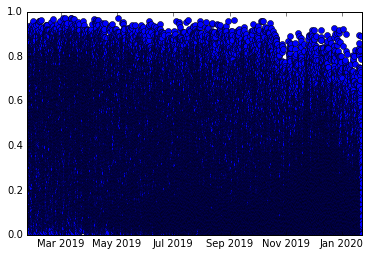

In [111]:
%matplotlib inline
#md_pred = md_pred[md_pred.deact_date != 'Deact_date']
md_pred['deact_date'] = pd.to_datetime(md_pred['deact_date'])
deact_date_list = list(md_pred['deact_date'])
print(deact_date_list)
prob_deact_list = list(md_pred['prob_deact'])
matplotlib.pyplot.plot_date(deact_date_list, prob_deact_list)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


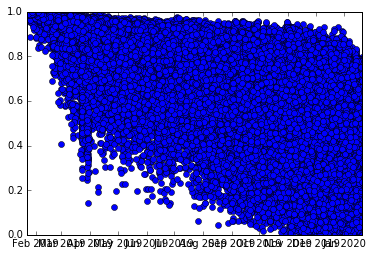

In [112]:
%matplotlib inline
#md_pred = md_pred[md_pred.deact_date != 'Deact_date']
eb_pred['deact_date'] = pd.to_datetime(eb_pred['deact_date'])
deact_date_list = list(eb_pred['deact_date'])
print(deact_date_list)
prob_deact_list = list(eb_pred['prob_deact'])
matplotlib.pyplot.plot_date(deact_date_list, prob_deact_list)
